In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3340: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['victoza'].value_counts()

0    359020
1      6393
Name: victoza, dtype: int64

In [6]:
victoza = cinci_1320[(cinci_1320['victoza']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
victoza['victoza'].value_counts()

1    6393
Name: victoza, dtype: int64

In [8]:
victoza['Change_Type'].value_counts()

UNCHANGED    6393
Name: Change_Type, dtype: int64

In [9]:
victoza['vict_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(victoza['victoza'], victoza['Number_of_Payments_Included_in_Total_Amount'], victoza['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
victoza['vict_dollars'].sum()

183112.96000000002

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'humira', 'levemir', 'invokana',
'entresto', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
victoza.drop(columns = drop_cols, inplace = True)

In [13]:
victoza_wkly = victoza.resample('w').sum()

In [14]:
victoza_wkly.head()

,victoza,vict_dollars
Date_of_Payment,,
2013-08-04,9,86.87
2013-08-11,33,2698.44
2013-08-18,16,267.06
2013-08-25,25,2668.66
2013-09-01,0,0.00


In [15]:
victoza_wkly.sort_index()

,victoza,vict_dollars
Date_of_Payment,,
2013-08-04,9,86.87
2013-08-11,33,2698.44
2013-08-18,16,267.06
2013-08-25,25,2668.66
2013-09-01,0,0.00
...,...,...
2019-11-10,0,0.00
2019-11-17,0,0.00
2019-11-24,0,0.00


Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [16]:
victoza_wkly['vict_dollars'] = [i+1 for i in victoza_wkly['vict_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [17]:
train = victoza_wkly.loc[:'2019-12-31']
train

,victoza,vict_dollars
Date_of_Payment,,
2013-08-04,9,87.87
2013-08-11,33,2699.44
2013-08-18,16,268.06
2013-08-25,25,2669.66
2013-09-01,0,1.00
...,...,...
2019-11-10,0,1.00
2019-11-17,0,1.00
2019-11-24,0,1.00


In [18]:
train['vict_dollars'].max()

6786.91

In [19]:
train.describe()

,victoza,vict_dollars
count,332.000000,332.000000
mean,19.256024,552.545060
std,14.256099,1150.398493
min,0.000000,1.000000
25%,6.750000,57.317500
50%,19.500000,196.055000
75%,29.000000,354.115000
max,61.000000,6786.910000


In [20]:
train.index.freq = 'W' 

In [21]:
train.shape

(332, 2)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 332 entries, 2013-08-04 to 2019-12-08
Freq: W-SUN
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   victoza       332 non-null    int64  
 1   vict_dollars  332 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


In [23]:
train.index

DatetimeIndex(['2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06',
               ...
               '2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=332, freq='W-SUN')

In [24]:
test = victoza_wkly.loc['2020-01-01':]
test

,victoza,vict_dollars
Date_of_Payment,,


In [25]:
test.describe()

,victoza,vict_dollars
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [26]:
test.shape

(0, 2)

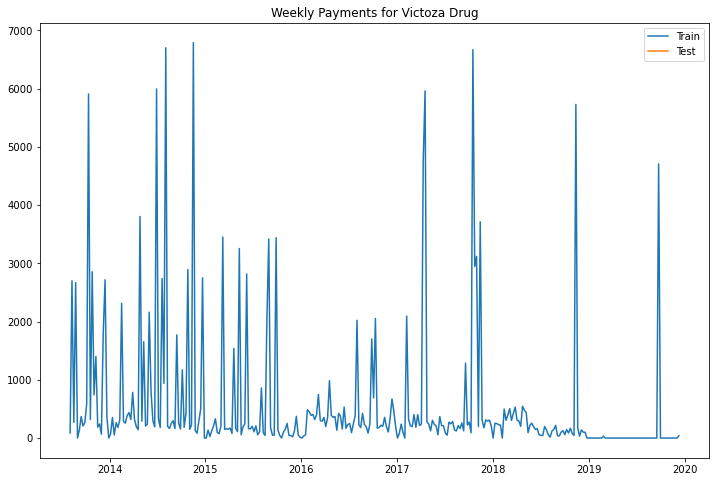

In [27]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Victoza Drug");

Baseline (Naive Model)

In [28]:
df_preds = test.copy(deep=True)
df_preds

,victoza,vict_dollars
Date_of_Payment,,


In [29]:
df_preds['simple_mean'] = train['vict_dollars'].mean()
df_preds

,victoza,vict_dollars,simple_mean
Date_of_Payment,,,


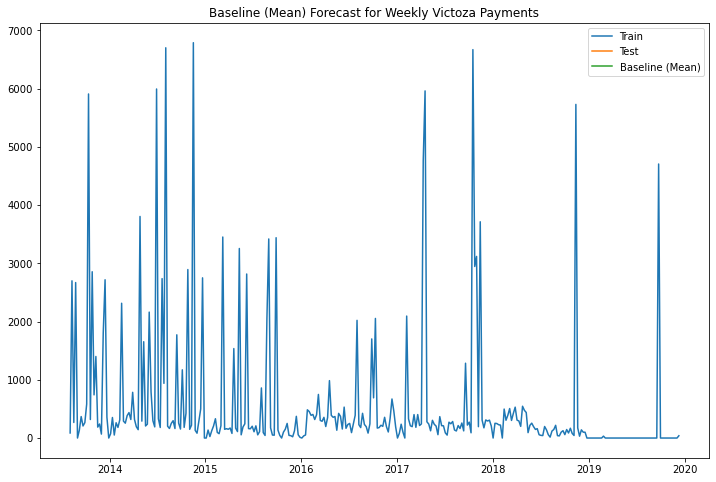

In [30]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Victoza Payments");

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_preds['vict_dollars'], df_preds['simple_mean'])

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

Make a Seasonal Baseline Model

In [ ]:
df_preds['seasonal_52'] = train['vict_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Victoza Payments");

In [ ]:
mean_absolute_error(df_preds['vict_dollars'], df_preds['seasonal_52'])

This is barely slightly better than the baseline model which had an MSE of 755.49.

Simple Exponential Smoothing Model

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [ ]:
ses = SimpleExpSmoothing(train['vict_dollars']).fit(smoothing_level=.5)

In [ ]:
ses.summary()

In [ ]:
ses_forecast = ses.forecast(len(test))

In [ ]:
df_preds['ses'] = ses_forecast

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Victoza Weekly Payments");

In [ ]:
mean_absolute_error(df_preds['vict_dollars'], df_preds['ses'])

This is horrible!  The MSE is nearly twice that of the baseline and seasonal models!  Will discard this model.

Holt-Winters Multiplicative Model with Seasonality of 52

In [ ]:
hw_m52 = ExponentialSmoothing(
    train['vict_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

In [ ]:
hw_m52.summary()

In [ ]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [ ]:
mean_absolute_error(df_preds["vict_dollars"], df_preds["hw_m52"])

This is not as good as the baseline or the seasonal models!

Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [ ]:
hw_a52 = ExponentialSmoothing(
    train['vict_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [ ]:
hw_a52.summary()

In [ ]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Victoza Payments");

In [ ]:
mean_absolute_error(df_preds["vict_dollars"], df_preds["hw_a52"])

Not good at all!

Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [ ]:
hw_a7 = ExponentialSmoothing(
    train['vict_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [ ]:
hw_a7.summary()

In [ ]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Victoza");

In [ ]:
mean_absolute_error(df_preds["vict_dollars"], df_preds["hw_a7"])

This looks pretty bad!

Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [ ]:
hw_m7 = ExponentialSmoothing(
    train['vict_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

In [ ]:
hw_m7.summary()

In [ ]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['vict_dollars'], label='Train')
plt.plot(test.index, test['vict_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Victoza Weekly Payments");

In [ ]:
mean_absolute_error(df_preds["vict_dollars"], df_preds["hw_m7"])

Beats seasonal 52 and baseline mean models, but prediction curve just looks all wrong!

Try a SARIMA Model

In [ ]:
from pmdarima.utils import tsdisplay

In [ ]:
traina = train['vict_dollars']

In [ ]:
tsdisplay(traina)

In [ ]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['vict_dollars'], m=7, trace=True)

In [ ]:
model_s7.summary()

In [ ]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

In [ ]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['vict_dollars'], label='Train')
plt.plot(test['vict_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Victoza Weekly Payments");

In [ ]:
mean_absolute_error(df_preds['vict_dollars'], df_preds['sarima7_auto'])

Try a SARIMA Model with m = 52

In [ ]:
model_s52 = pmd.auto_arima(train['vict_dollars'], m=52, trace=True)

In [ ]:
model_s52.summary()

In [ ]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

In [ ]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['vict_dollars'], label='Train')
plt.plot(test['vict_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Victoza Weekly Payments");

In [ ]:
mean_absolute_error(df_preds['vict_dollars'], df_preds['sarima52_auto'])

Look at some plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
plot_acf(victoza['vict_dollars'], alpha=None, lags=24);

In [ ]:
plot_pacf(Victoza['vict_dollars'], lags=24);